In [7]:
##################################
##################################
# Física Computacional 2 - PEC 5 #
##################################
##################################

import numpy as np
import sympy as sp
import pandas as pd
from IPython.display import Markdown, Math, Latex
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

%matplotlib inline

sp.init_session(use_latex=True)
np.set_printoptions(suppress=True, linewidth=110, precision=7)

matriz_ptos_x=[]
 
def trapecio_compuesta(f, a, b, n):
    '''
    Aproxima la integral de la función f(x) entre a y b
    mediante la regla compuesta del trapecio

    Parametros
    ----------
    vector f : función a integrar
    int a , b : límites de integración
    int n : número de subintervalos en (a,b).

    Devuelve
    --------
    float resultado: Valor aproximado de la integral
    int evaluaciones: número de veces que se ha evaluado f(x)
    
    Ejemplo de uso
    ______________
    
    Integración de la función x**2+2x entre 0 y 4 utilizando 4 subintervalos:
    
            eval, res = trapecio_compuesta(lambda x: x**2+2x, 0, 4, 4)
            
    ________________________________________________________________________
    '''
    # Cálculo de h
    h = (b-a)/n
    x0 = f(a)+f(b)
    
    x1 = 0 # recoge la sum de f(x_i-1)
    x2 = 0 # recoge la suma de f(x_2i)
    
    evaluaciones = 2 # Cuenta el número de veces que se evalua f. Empieza en dos
                     # porque de entrada siempre se evalua f(a) y  f(b)
    global matriz_ptos_x
    matriz_ptos_x =[]
    for i in range(1, n):
        x = a+i*h
        x2 = x2 + f(x)
        evaluaciones += 1
        matriz_ptos_x.append(x)
#         print('x', x)
    resultado = h*(x0+2*x2)/2
    return evaluaciones, resultado

def romberg2(f, a, b, p):
    """
    Implementación del método de integración Romberg

    Entrada:
    --------
    f:  función a integrar
    a, b: límites de integración
    p:  número de filas de la tabla de Romberg
    """

    I = np.zeros((p, p))
    for k in range(0, p):
        # Regla compuesta del trapecio
        eval, resu = trapecio_compuesta(f, a, b, 2**k)
        I[k, 0] = resu

        # Fórmula de Romberg
        for j in range(0, k):
            I[k, j+1] = (4**(j+1) * I[k, j] - I[k-1, j]) / (4**(j+1) - 1)

#         print(I[k,0:k+1])   # resultados intermedios

    display(Markdown('Número de evaluaciones: {}'.format(eval)))
    return I

matriz_xi=[]

def plegendre(n):
    """
    Implementación de un generador de los coeficientes de un polinomio
    de Legendre de grado n
    The generator of the coefficient of Legendre polynomial of degree n
    
    Parámetros:
    -----------
    n: grado del polinomio de Legendre
    
    Devuelve:
    ---------
    c: coeficientes del polinomio
 
    Ejemplo de uso:
    ---------------
    p = plegendre(3)
    """
    
    if n <= 0:
        c = np.array([1])
    elif n == 1:
        c = np.array([1,0])
    else:
        a = list(plegendre(n-1))
        a.append(0)
        a = np.array(a)
 
        c = list(plegendre(n-2))
        b = [0,0]
        b.extend(c)
        b = np.array(b)
 
        c = ((2*n-1)*a+(n-1)*b)/float(n)
 
    return c

def gauss_legendre_cr(n):
    """
    Función para calcular las raíces de los polinomios de Legendre
    y los coeficientes c_i para el grado n
    
    Argumentos:
    -----------
    n: grado del polinomio
    
    Devuelve:
    ---------
     x: matriz con las raíces de los polinomios de Legendre de grado n,
        son los nodos que se utilizarán.
    resultado: matriz con los pesos asociados. 
    Ejemplo de uso
    x,w = gauss_legendre_cr(4)
    """
    
    if n<0:
        display(Markdown( "El grado n ha de ser positivo."))
        return
     
    c = plegendre(n)
    p = np.poly1d(c) # Se construye el polinomio de coeficientes c
    x = np.imag(p.r) # Devuelve la parte imaginaria de las raíces de p
     
    A = np.matrix(np.zeros([n,n]),dtype='complex')
    b = np.matrix(np.zeros([n,1]),dtype='complex')
    A[0,:] = 1
    b[0,0] = 2
    for i in range(1,n):
        for j in range(n):
            A[i,j] = x[j]**i
        if i%2 != 0:
            b[i,0] = 0
        else:
            b[i,0] = float(2)/(i+1)
 
    resultado = npln.solve(A,b)
                   
    return x,np.real(resultado)

def cuadratura_gauss(f,a,b,n):
    """
    Implementación de la integración mediante cuadratura de Gauss de
    una función f en un intervalo arbitrario [a, b] utilizando polinomio
    de grado n
    
    Parámetros:
    -----------
    f: función a integrar
    a, b : límites de integración
    n: grado polinomio
    
    Devuelve:
    ---------
    resultado: resultado numérico de la integración.
 
    Ejemplo de uso:
    ---------------
    Integrar la función 3*x**5+4*x**3-2*x+1 entre -2 y 3 con n=4
    resultado = cuadratura_gauss(lambda x: 3*x**5+4*x**3-2*x+1, -2, 3, 4)
    """
 
    x,w = gauss_legendre_cr(n)
    x = ((b-a)*x+a+b)/2
    y = f(x)
#     print(x)
#     print(type(y))
    resultado = np.dot(y,w)*(b-a)/2.0
    return float(resultado.real)

def cuadratura_gauss2(f,a,b,archivo):
    """
    Implementación de la integración mediante cuadratura de Gauss de
    una función f en un intervalo arbitrario [a, b] utilizando polinomio
    de grado n. En este caso se pasa el nombre de un fichero con las raíces 
    y los pesos
    
    Parámetros:
    -----------
    f: función a integrar
    a, b : límites de integración
    archivo: grado polinomio
    
    Devuelve:
    ---------
    resultado: resultado numérico de la integración.
 
    Ejemplo de uso:
    ---------------
    Integrar la función 3*x**5+4*x**3-2*x+1 entre -2 y 3 con n=4
    resultado = cuadratura_gauss(lambda x: 3*x**5+4*x**3-2*x+1, -2, 3, archivodatos.txt)
    """
    global matriz_xi 
    matriz_xi=[]
    datos = pd.read_table('QG64.dat',names=['raices', 'pesos'], delim_whitespace=True, header=None)
    pd.set_option('display.precision', 16)
#     display(datos)
    w = np.asarray(datos['pesos'].values.tolist())
    x = np.asarray(datos['raices'].values.tolist())
    x = ((b-a)*x+a+b)/2
    y = f(x)
    matriz_xi.append(x)
#     print(x)
#     print(type(y))
    resultado = np.dot(y,w)*(b-a)/2.0
    return float(resultado.real)

IPython console for SymPy 1.3 (Python 3.7.5-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.3/



In [8]:
"""
Apartado a)
"""
valor_n = [1, 2, 4, 6, 8, 16, 32, 64, 128, 256]

################
# Función C(w) #
################
funcion_c = lambda x: np.cos((np.pi/2)*x**2)
matrix_c = np.zeros((2, len(valor_n)))
m_contador = 0
matriz_x_trapecio_C = []

for i in valor_n:
    eval, res = trapecio_compuesta(funcion_c, 0, 5, i)
    matrix_c[0, m_contador] = res
    matrix_c[1, m_contador] = eval
    if i == 64:
        matriz_x_trapecio_C = matriz_ptos_x.copy()
    m_contador +=1

tabla_c = pd.DataFrame(matrix_c,columns=valor_n, index=('res', 'eval'))
display(Markdown('Resultado para $C=\\int_0^5\\cos\\left(\\frac{\\pi}{2}x^2\\right)dx$'))
display(tabla_c)
# display(len(matriz_ptos_x))
################
# Función S(w) #
################
funcion_s = lambda x: np.sin((np.pi/2)*x**2)
matrix_s = np.zeros((2, len(valor_n)))
m_contador = 0
matriz_x_trapecio_S = []
for i in valor_n:
    eval, res = trapecio_compuesta(funcion_s, 0, 5, i)
    matrix_s[0, m_contador] = res
    matrix_s[1, m_contador] = eval
    if i == 64:
        matriz_x_trapecio_S = matriz_ptos_x.copy()
    m_contador +=1
tabla_s = pd.DataFrame(matrix_s,columns=valor_n, index=('res', 'eval'))
display(Markdown('Resultado para $S=\\int_0^5\\sin\\left(\\frac{\\pi}{2}x^2\\right)dx$'))
display(tabla_s)
# display(len(matriz_ptos_x))

Resultado para $C=\int_0^5\cos\left(\frac{\pi}{2}x^2\right)dx$

,1,2,4,6,8,16,32,64,128,256
res,2.4999999999999996,-1.0596988312782172,-2.7400933906827762,-0.5565020777348471,-0.8525839844506502,0.3211354771051751,0.5279261018627922,0.5554337226772808,0.5616211714063722,0.5631310609097672
eval,2.0000000000000000,3.0000000000000000,5.0000000000000000,7.0000000000000000,9.0000000000000000,17.0000000000000000,33.0000000000000000,65.0000000000000000,129.0000000000000000,257.0000000000000000


Resultado para $S=\int_0^5\sin\left(\frac{\pi}{2}x^2\right)dx$

,1,2,4,6,8,16,32,64,128,256
res,2.5,0.2932914190872754,0.8171158893362452,-0.0639846059767503,-0.0474042095961038,0.5289650026401413,0.4993972392661861,0.4992000345607303,0.499191875248113,0.499191412062917
eval,2.0,3.0000000000000000,5.0000000000000000,7.0000000000000000,9.0000000000000000,17.0000000000000000,33.0000000000000000,65.0000000000000000,129.000000000000000,257.000000000000000


In [9]:
"""
Apartado b)
"""
valor_n = [1, 2, 4, 6, 8, 16, 32, 64, 128, 256]

columnas = ['$O(h{_k}{^2})$', '$O(h{_k}^{4})$', '$O(h{_k}{^6})$', '$O(h{_k}{^8})$', '$O(h{_k}{^{10}})$',\
            '$O(h{_k}{^{12}})$', '$O(h{_k}{^{14}})$', '$O(h{_k}{^{16}})$', '$O(h{_k}{^{18}})$']

################
# Función C(w) #
################
funcion_c = lambda x: np.cos((np.pi/2)*x**2)
salidaC = romberg2(funcion_c, 0,5, 9)
pd.set_option('display.precision', 8)
tabla =pd.DataFrame(salidaC, index=[1, 2, 4, 8, 16, 32, 64, 128, 256], columns=['','','','','','','','','',])
tabla.index.name = 'n'
display(Markdown('Resultado para $C=\\int_0^5\\cos\\left(\\frac{\\pi}{2}x^2\\right)dx$'))
display(tabla)
tabla.to_latex('aptado_b-C.tex')

################
# Función S(w) #
################
funcion_s = lambda x: np.sin((np.pi/2)*x**2)
salidaS = romberg2(funcion_s, 0,5, 9)
pd.set_option('display.precision', 8)

tabla =pd.DataFrame(salidaS, index=[1, 2, 4, 8, 16, 32, 64, 128, 256], columns=['','','','','','','','','',])
tabla.index.name = 'n'
display(Markdown('Resultado para $S=\\int_0^5\\sin\\left(\\frac{\\pi}{2}x^2\\right)dx$'))
display(tabla)
tabla.to_latex('aptado_b-S.tex')

Número de evaluaciones: 257

Resultado para $C=\int_0^5\cos\left(\frac{\pi}{2}x^2\right)dx$

,,,,,,,,,
n,,,,,,,,,
1,2.50000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
2,-1.05969883,-2.24626511,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
4,-2.74009339,-3.30022491,-3.37048890,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
8,-0.85258398,-0.22341418,-0.01829347,0.03491598,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
16,0.32113548,0.71237530,0.77476126,0.78734943,0.79030015,0.00000000,0.00000000,0.00000000,0.00000000
32,0.52792610,0.59685631,0.58915504,0.58620891,0.58542013,0.58521985,0.00000000,0.00000000,0.00000000
64,0.55543372,0.56460293,0.56245270,0.56202886,0.56193403,0.56191108,0.56190538,0.00000000,0.00000000
128,0.56162117,0.56368365,0.56362237,0.56364094,0.56364726,0.56364893,0.56364936,0.56364946,0.00000000
256,0.56313106,0.56363436,0.56363107,0.56363121,0.56363117,0.56363116,0.56363115,0.56363115,0.56363115


Número de evaluaciones: 257

Resultado para $S=\int_0^5\sin\left(\frac{\pi}{2}x^2\right)dx$

,,,,,,,,,
n,,,,,,,,,
1,2.50000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
2,0.29329142,-0.44227811,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
4,0.81711589,0.99172405,1.08732419,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
8,-0.04740421,-0.33557758,-0.42406435,-0.44805464,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
16,0.52896500,0.72108807,0.79153245,0.81082764,0.81576443,0.00000000,0.00000000,0.00000000,0.00000000
32,0.49939724,0.48954132,0.47410487,0.46906633,0.46772609,0.46738588,0.00000000,0.00000000,0.00000000
64,0.49920003,0.49913430,0.49977383,0.50018128,0.50030330,0.50033514,0.50034319,0.00000000,0.00000000
128,0.49919188,0.49918916,0.49919281,0.49918359,0.49917968,0.49917858,0.49917830,0.49917823,0.00000000
256,0.49919141,0.49919126,0.49919140,0.49919138,0.49919141,0.49919142,0.49919142,0.49919142,0.49919142


In [10]:
 """
Apartado c)

"""
################
# Función C(w) #
################
funcion_c = lambda x: np.cos((np.pi/2)*x**2)
resultado_c = cuadratura_gauss2(funcion_c, 0, 5, 'QG64.dat') 
display(Markdown('Resultado para $C=\\int_0^5\\cos\\left(\\frac{\\pi}{2}x^2\\right)dx $'))
display(Markdown('{}'.format(resultado_c)))
matriz_gaussiana_C = np.asarray(matriz_xi)

################
# Función S(w) #
################
funcion_s = lambda x: np.sin((np.pi/2)*x**2)
resultado_s = cuadratura_gauss2(funcion_s, 0, 5, 'QG64.dat')
display(Markdown('Resultado para $S=\\int_0^5\\sin\\left(\\frac{\\pi}{2}x^2\\right)dx $'))
display(Markdown('{}'.format(resultado_s)))
matriz_gaussiana_S = np.asarray(matriz_xi)

Resultado para $C=\int_0^5\cos\left(\frac{\pi}{2}x^2\right)dx $

0.5636311887040101

Resultado para $S=\int_0^5\sin\left(\frac{\pi}{2}x^2\right)dx $

0.4991913819171172

0.5619053837640446 0.5003431859966262
0.5554337226772808 0.4992000345607303
0.5636311887040101 0.4991913819171172


**Error absoluto para la integral C**

* Regla del trapecio: 0.006471661086763891

* Cuadratura gaussiana: 0.0017258049399654363

**Error absoluto para la integral S**

* Regla del trapecio: 0.0011431514358958839

* Cuadratura gaussiana: 0.001151804079508989

**Error absoluto para la integral C 256**

* Regla del trapecio: 0.008197426795816365

* Cuadratura gaussiana: 3.923091296265113e-08

**Error absoluto para la integral S 256**

* Regla del trapecio: 8.613069685803332e-06

* Cuadratura gaussiana: 3.957392730180587e-08

**Tabla de puntos $x_i$ - Cuadratura Gaussiana (integral C)**

Tabla salvada en archivo

**Tabla de puntos $x_i$ - Cuadratura Gaussiana (integral S)**

Tabla salvada en archivo

**Tabla de puntos $x_i$ - Regla compuesta del trapecio (integral C)**

Tabla salvada en archivo

**Tabla de puntos $x_i$ - Regla compuesta del trapecio (integral S)**

Tabla salvada en archivo

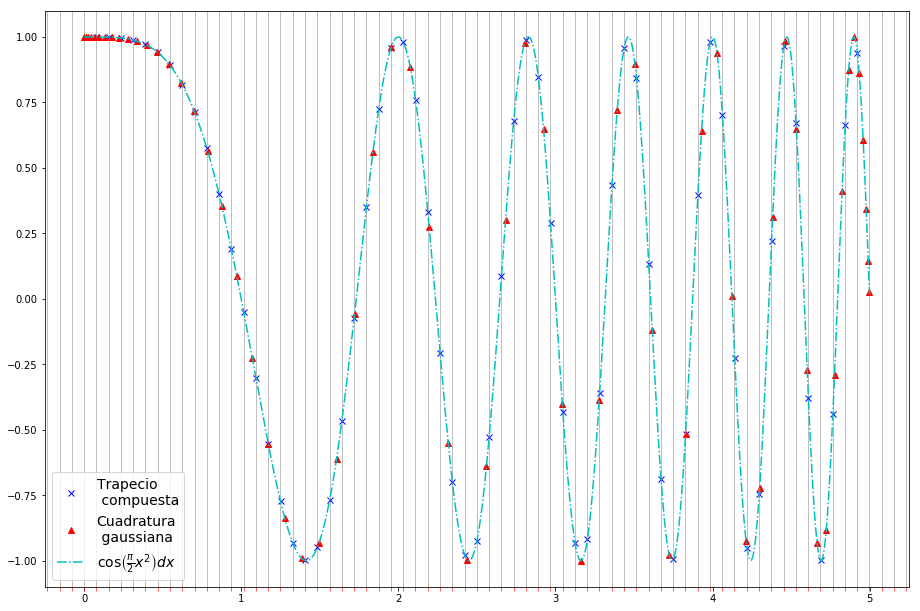

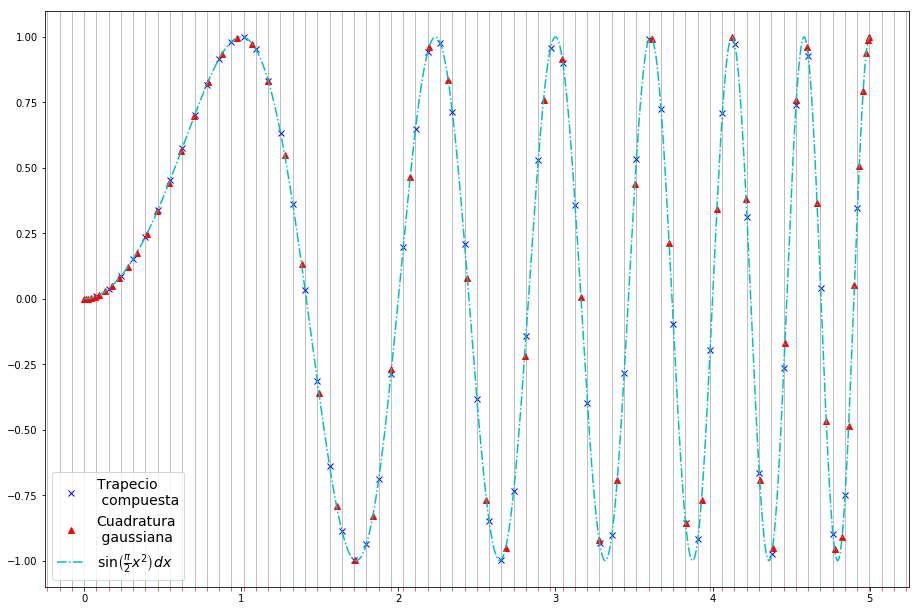

In [11]:
"""
Apartado d)

"""
#####################
# Errores absolutos #
#####################

# Valores para n = 64

c_romberg = salidaC[6, 6]
s_romberg = salidaS[6, 6]

# Valores para n = 256
c_romberg256 = salidaC[8, 8]
s_romberg256 = salidaS[8, 8]

c_trapecio = matrix_c[0, 7]
s_trapecio = matrix_s[0, 7]
c_cuadratura = resultado_c
s_cuadratura = resultado_s
print(c_romberg, s_romberg)
print(c_trapecio, s_trapecio)
print(c_cuadratura, s_cuadratura)

absoluto_c_trapecio = abs(c_romberg - c_trapecio)
absoluto_c_cuadratura = abs(c_romberg - c_cuadratura)

absoluto_s_trapecio = abs(s_romberg - s_trapecio)
absoluto_s_cuadratura = abs(s_romberg - s_cuadratura)

absoluto_c_trapecio256 = abs(c_romberg256 - c_trapecio)
absoluto_c_cuadratura256 = abs(c_romberg256 - c_cuadratura)

absoluto_s_trapecio256 = abs(s_romberg256 - s_trapecio)
absoluto_s_cuadratura256 = abs(s_romberg256 - s_cuadratura)

display(Markdown('**Error absoluto para la integral C**'))
display(Markdown('* Regla del trapecio: {}'.format(absoluto_c_trapecio)))
display(Markdown('* Cuadratura gaussiana: {}'.format(absoluto_c_cuadratura)))

display(Markdown('**Error absoluto para la integral S**'))
display(Markdown('* Regla del trapecio: {}'.format(absoluto_s_trapecio)))
display(Markdown('* Cuadratura gaussiana: {}'.format(absoluto_s_cuadratura)))

display(Markdown('**Error absoluto para la integral C 256**'))
display(Markdown('* Regla del trapecio: {}'.format(absoluto_c_trapecio256)))
display(Markdown('* Cuadratura gaussiana: {}'.format(absoluto_c_cuadratura256)))

display(Markdown('**Error absoluto para la integral S 256**'))
display(Markdown('* Regla del trapecio: {}'.format(absoluto_s_trapecio256)))
display(Markdown('* Cuadratura gaussiana: {}'.format(absoluto_s_cuadratura256)))

########################################
# Tabla x_i de la cuadratura gaussiana #
########################################

cuadraturaC = pd.DataFrame(matriz_gaussiana_C)
display(Markdown('**Tabla de puntos $x_i$ - Cuadratura Gaussiana (integral C)**'))
# display(cuadraturaC)
cuadraturaC.to_latex('absoluto_c_cuadratura.tex')
cuadraturaC.to_csv('absoluto_c_cuadratura.csv')
display(Markdown('Tabla salvada en archivo'))

cuadraturaS = pd.DataFrame(matriz_gaussiana_S)
display(Markdown('**Tabla de puntos $x_i$ - Cuadratura Gaussiana (integral S)**'))
# display(cuadraturaS)
cuadraturaC.to_latex('absoluto_s_cuadratura.tex')
cuadraturaC.to_csv('absoluto_s_cuadratura.csv')
display(Markdown('Tabla salvada en archivo'))

#############################################
# Tabla x_i de regla compuesta del trapecio #
#############################################
matriz_trapecioC = np.asarray(matriz_x_trapecio_C)
trapecioC = pd.DataFrame(matriz_trapecioC.transpose())
display(Markdown('**Tabla de puntos $x_i$ - Regla compuesta del trapecio (integral C)**'))
# display(cuadratura)
trapecioC.to_latex('absoluto_c_trapecio.tex')
trapecioC.to_csv('absoluto_c_trapecio.csv')
display(Markdown('Tabla salvada en archivo'))

matriz_trapecioS = np.asarray(matriz_x_trapecio_S)
trapecioS = pd.DataFrame(matriz_trapecioS.transpose())
display(Markdown('**Tabla de puntos $x_i$ - Regla compuesta del trapecio (integral S)**'))
# display(trapecioS)
trapecioS.to_latex('absoluto_s_trapecio.tex')
trapecioS.to_csv('absoluto_s_trapecio.csv')
display(Markdown('Tabla salvada en archivo'))

############
# Gráficos #
############

ejex = np.arange(0, 5, 0.001)
ejeyct = []
ejeycc = []

# Integral C
def ct(x):
    return np.cos((np.pi/2)*x**2)
for i in matriz_x_trapecio_C:
    ejeyct.append(ct(i))
def cc(x):
    return np.cos((np.pi/2)*x**2)
for i in matriz_xi:
    ejeycc.append(ct(i))

grafica_c = plt.figure(figsize=(12, 8))
c = grafica_c.add_axes([0,0,1,1])

c.plot((matriz_trapecioC), (ejeyct),'bx', label='Trapecio\n compuesta'  )
c.plot((matriz_xi[0]), (ejeycc[0]),'r^', label='Cuadratura\n gaussiana'  )
c.plot(ejex, [ct(i) for i in ejex], 'c-.', label='$\\cos\\left(\\frac{\\pi}{2}x^2\\right)dx $' )
c.xaxis.set_minor_locator(MultipleLocator(0.0781))
c.tick_params(which='minor', length=4, color='r')
c.grid(True, which='minor', axis='x')
c.legend(loc='best', fontsize='14')
grafica_c.savefig('grafica_c.png', bbox_inches='tight')

# Integral S
ejeyst = []
ejeysc = []

def st(x):
    return np.sin((np.pi/2)*x**2)
for i in matriz_x_trapecio_S:
    ejeyst.append(st(i))

for i in matriz_xi:
    ejeysc.append(st(i))

grafica_s = plt.figure(figsize=(12, 8))
s = grafica_s.add_axes([0,0,1,1])
s.plot((matriz_x_trapecio_S), (ejeyst),'bx', label='Trapecio\n compuesta'  )
s.plot((matriz_xi[0]), (ejeysc[0]),'r^', label='Cuadratura\n gaussiana'  )
s.plot(ejex, [st(i) for i in ejex], 'c-.', label='$\\sin\\left(\\frac{\\pi}{2}x^2\\right)dx $' )
s.xaxis.set_minor_locator(MultipleLocator(0.0781))
s.tick_params(which='minor', length=4, color='r')
s.grid(True, which='minor', axis='x')
s.legend(loc='lower left', fontsize='14')
grafica_s.savefig('grafica_s.png', bbox_inches='tight')

In [12]:
"""
Apartado e)

"""
lx = 4*(np.sqrt(79)/25)*1e-3
ly = 6*(np.sqrt(79)/25)*1e-3
q0 = 400*1e-3
londa = 632*1e-9
x1 = -lx/2
x2 = lx/2
y1 = -ly/2
y2 = ly/2

u1 = x1*np.sqrt(2/(londa*q0))
u2 = x2*np.sqrt(2/(londa*q0))

v1 = y1*np.sqrt(2/(londa*q0))
v2 = y2*np.sqrt(2/(londa*q0))

print(u1)
print(u2)

print(v1)
print(v2)

cu2 = cuadratura_gauss2(funcion_c, 0, u2, 'QG64.dat')
cv2 = cuadratura_gauss2(funcion_c, 0, v2, 'QG64.dat')
su2 = cuadratura_gauss2(funcion_s, 0, u2, 'QG64.dat')
sv2 = cuadratura_gauss2(funcion_s, 0, v2, 'QG64.dat')
# print(cu2)
# print(cv2)
# print(su2)
# print(sv2)
ec = '$\\frac{I}{I_0}=\\frac{1}{4}\\left[(2C(u_2))^2+(2S(u_2))^2\\right]\\cdot\\left[(2C(v_2))^2+(2S(v_2))^2\\right]$'
display(Markdown('Teniendo en cuenta la paridad de las ecuaciones de Fresnel, \
                la expresión para la intensidad relativa del patrón de difracción es: <br>{}'.format(ec)))

intensidad = (((2*cu2)**2+(2*su2**2))*((2*cv2)**2+(2*sv2**2)))/4

display(Markdown('Intensidad relativa del patrón de difracción $\\frac I I_0 =$ {}'.format(intensidad)))

-1.9999999999999996
1.9999999999999996
-2.9999999999999996
2.9999999999999996


Teniendo en cuenta la paridad de las ecuaciones de Fresnel,                 la expresión para la intensidad relativa del patrón de difracción es: <br>$\frac{I}{I_0}=\frac{1}{4}\left[(2C(u_2))^2+(2S(u_2))^2\right]\cdot\left[(2C(v_2))^2+(2S(v_2))^2\right]$

Intensidad relativa del patrón de difracción $\frac I I_0 =$ 0.5828952841935601

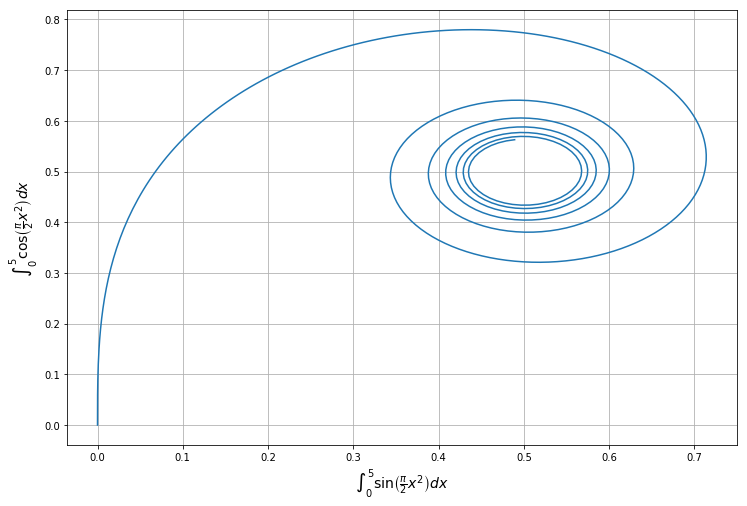

In [23]:
"""
    Apartado f)
    (opcional)
"""
ejex2 = np.arange(0, 5, 0.01)
valores_c =[]
valores_s = []
for i in ejex2:
    valores_c.append(cuadratura_gauss2(funcion_c, 0, i, 'QG64.dat'))
    valores_s.append(cuadratura_gauss2(funcion_s, 0, i, 'QG64.dat'))
plt.figure(figsize=(12, 8))
plt.xlabel('$\\int_0^5\\sin\\left(\\frac{\\pi}{2}x^2\\right)dx$', fontsize='14')
plt.ylabel('$\\int_0^5\\cos\\left(\\frac{\\pi}{2}x^2\\right)dx$', fontsize='14')
plt.grid(True)
plt.plot(valores_s, valores_c  )
plt.savefig('apartado_f.png')

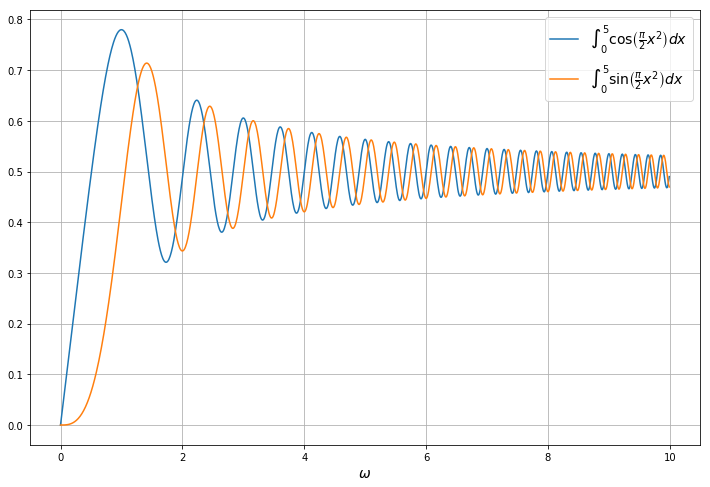

In [22]:
"""
Apartado f).2
"""

ejex3 = np.arange(0, 10, 0.01)
valores_c3 =[]
valores_s3 = []
for i in ejex3:
    valores_c3.append(cuadratura_gauss2(funcion_c, 0, i, 'QG64.dat'), )
    valores_s3.append(cuadratura_gauss2(funcion_s, 0, i, 'QG64.dat'))
plt.figure(figsize=(12, 8))
plt.xlabel('$\\omega$', fontsize='14')
# plt.ylabel('$\\int_0^5\\cos\\left(\\frac{\\pi}{2}x^2\\right)dx$', fontsize='14')
plt.grid(True)
plt.plot(ejex3, valores_c3 , label='$\\int_0^5\\cos\\left(\\frac{\\pi}{2}x^2\\right)dx$')
plt.plot(ejex3, valores_s3 , label='$\\int_0^5\\sin\\left(\\frac{\\pi}{2}x^2\\right)dx$')
plt.legend(loc='best', fontsize='14' )
plt.savefig('apartado_f2.png')

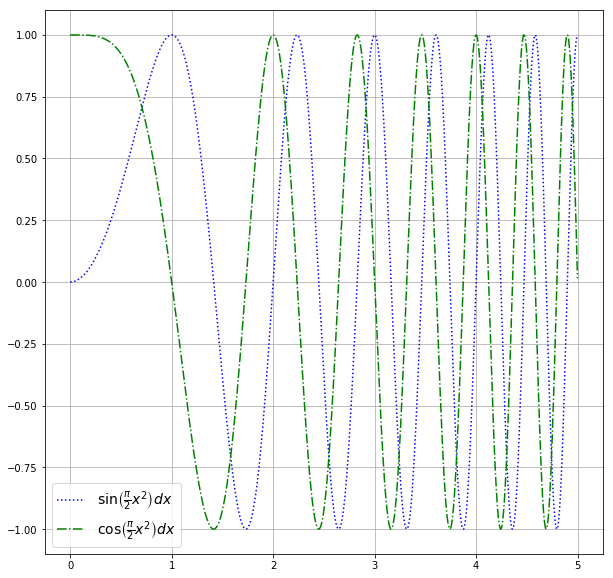

In [14]:
"""
Gráfica de las funciones C(5) y S(5)

"""
plt.figure(figsize=(10, 10))
plt.grid(True)
plt.plot(ejex, [st(i) for i in ejex], 'b:', label='$\\sin\\left(\\frac{\\pi}{2}x^2\\right)dx $' )
plt.plot(ejex, [ct(i) for i in ejex], 'g-.', label='$\\cos\\left(\\frac{\\pi}{2}x^2\\right)dx $' )
plt.legend(loc='lower left', fontsize='14')
plt.savefig('general-grafica.png')
